In [1]:
# import bibliotek i pakietów

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# wgranie zbioru danych

laptop = pd.read_csv("/content/laptop_price.csv", encoding="cp1252")

In [3]:
# wyświetlenie kilku pierwszych wierszy zbioru

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# wyświetlenie informacje o zbiorze danych

laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# wyświetlenie statystyki

laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


<ipython-input-6-cebe1f722284>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop.Price_euros, kde=True)


<Axes: xlabel='Price_euros', ylabel='Density'>

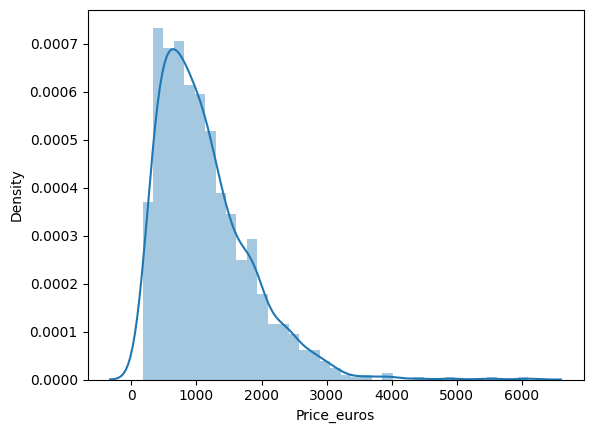

In [6]:
# sprawdzenie rozkładu zmiennej 'Price_euros' 
sns.distplot(laptop.Price_euros, kde=True)

In [7]:
# średnia cena laptopa dla danego producenta

mean_price = laptop.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

In [8]:
mean_price_df = pd.DataFrame(mean_price)

In [9]:
mean_price_df = mean_price_df.reset_index()

In [10]:
type(mean_price_df)

pandas.core.frame.DataFrame

In [11]:
mean_price_df

,Company,Price_euros
0,Razer,3346.142857
1,LG,2099.000000
2,MSI,1728.908148
3,Google,1677.666667
4,Microsoft,1612.308333
5,Apple,1564.198571
6,Huawei,1424.000000
7,Samsung,1413.444444
8,Toshiba,1267.812500
9,Dell,1186.068990


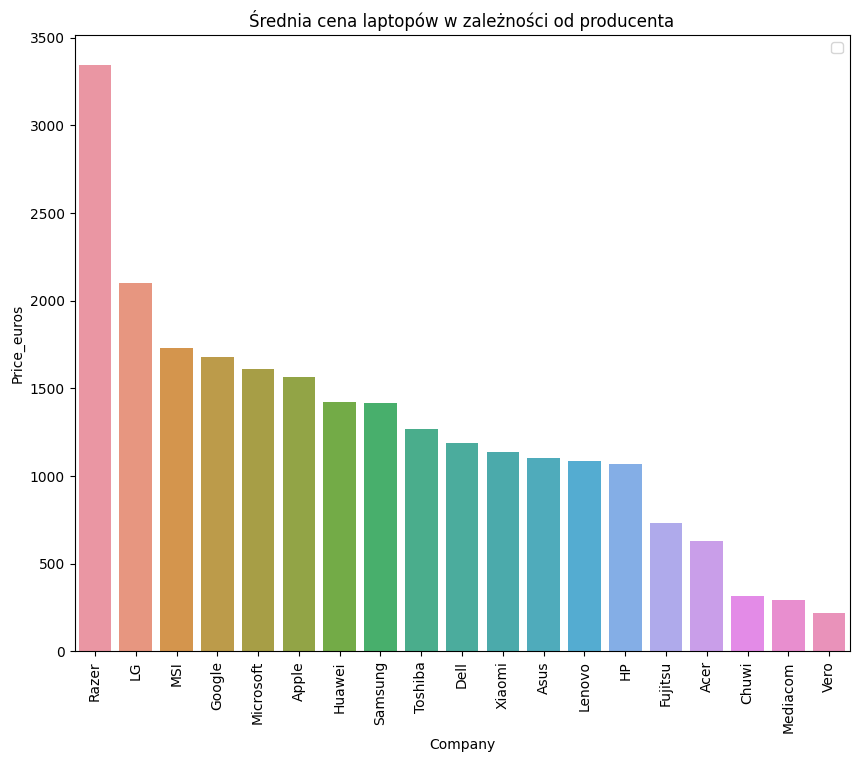

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Producent")
ax.set_ylabel("Średnia cena [euro]")
ax.set_title("Średnia cena laptopów w zależności od producenta")
sns.barplot(data=mean_price_df, x="Company", y="Price_euros")
ax.legend()
plt.show()


In [13]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [14]:
# zamiana nazwy kolumny "RAM" na "RAM [GB]"
laptop.columns = laptop.columns.str.replace("Ram", "Ram [GB]")

In [15]:
# usunięcie "GB" z nowej kolumny
laptop['Ram [GB]'] = laptop['Ram [GB]'].map(lambda x: x.rstrip('GB'))

In [16]:
# zamiana typu danych na liczbowe w kolumnie "RAM [GB]"
laptop["Ram [GB]"] = laptop['Ram [GB]'].apply(pd.to_numeric)

In [17]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram [GB]          1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 132.5+ KB


In [18]:
laptop.columns = laptop.columns.str.replace("Weight", "Weight [kg]")

In [19]:
laptop['Weight [kg]'] = laptop['Weight [kg]'].map(lambda x: x.rstrip('kg'))

In [20]:
laptop["Weight [kg]"] = laptop['Weight [kg]'].apply(pd.to_numeric)

In [21]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram [GB]          1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight [kg]       1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [22]:
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram [GB],Memory,Gpu,OpSys,Weight [kg],Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [23]:
# utworzenie kolumny z informacją, czy laptop posiada dysk SSD

laptop['Memory_SSD'] = laptop['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)

In [24]:
# utworzenie kolumny z informacją, czy laptop posiada system operacyjny
laptop['OpSys_incl'] = laptop['OpSys'].apply(lambda x: 0 if 'No OS' in x else 1)

In [25]:
import numpy as np

# tworzenie listy "companies" (warunków)
companies = [
    (laptop['Company'] == "Vero"),
    (laptop['Company'] == "Mediacom"),    
    (laptop['Company'] == "Chuwi"),
    (laptop['Company'] == "Acer"),
    (laptop['Company'] == "Fujitsu"),
    (laptop['Company'] == "HP"),
    (laptop['Company'] == "Lenovo"),
    (laptop['Company'] == "Asus"),
    (laptop['Company'] == "Xiaomi"),
    (laptop['Company'] == "Dell"),
    (laptop['Company'] == "Toshiba"),
    (laptop['Company'] == "Samsung"),
    (laptop['Company'] == "Huawei"),
    (laptop['Company'] == "Apple"),
    (laptop['Company'] == "Microsoft"),
    (laptop['Company'] == "Google"),
    (laptop['Company'] == "MSI"),
    (laptop['Company'] == "LG"),
    (laptop['Company'] == "Razer")
    ]

# tworzenie listy z numerami, które przypiszemy poszczególnym producentom 
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# utworzenie kolumny, z przypisanymi numerami producentów
laptop['Company_ID'] = np.select(companies, values)



In [26]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram [GB],Memory,Gpu,OpSys,Weight [kg],Price_euros,Memory_SSD,OpSys_incl,Company_ID
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,1,13
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,13
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1,0,5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1,1,13
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,1,13


In [27]:
# tworzenie listy "types" (warunków)
types = [
    (laptop['TypeName'] == "Netbook"),
    (laptop['TypeName'] == "Notebook"),
    (laptop['TypeName'] == "2 in 1 Convertible"),
    (laptop['TypeName'] == "Ultrabook"),
    (laptop['TypeName'] == "Gaming"),
    (laptop['TypeName'] == "Workstation")
    ]

# tworzenie listy z numerami, które przypiszemy poszczególnym rodzajom laptopów 
values1 = [0, 1, 2, 3, 4, 5]

# utworzenie kolumny, z przypisanymi numerami rodzajów laptopów
laptop['TypeName_ID'] = np.select(types, values1)

<Axes: >

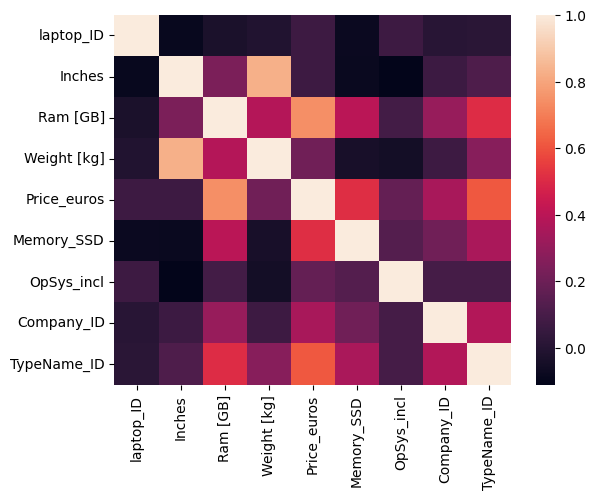

In [55]:
# sprawdzenie korelacji między zmiennymi

laptop_corr = laptop.corr()
sns.heatmap(laptop_corr)

In [118]:
# zdefiniowanie zmiennej X
X = laptop[['Ram [GB]', "Weight [kg]"]]

In [119]:
# zdefiniowanie zmiennej y
y = laptop['Price_euros']

In [120]:
# podzielenie danych na zbiór treningowy i testowy

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

# Regresja liniowa 
###### (dla 2 zmiennych: "Ram [GB]" i "Weight [kg]")

In [121]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym 

modellin_2x = LinearRegression()
modellin_2x.fit(X_train, y_train)

LinearRegression()

In [122]:
# predykcja na zbiorze testowym

y_predlin_2x=modellin_2x.predict(X_test)

In [123]:
# obliczenie współczynnika r2

r2_score(y_test, y_predlin_2x)

0.6816611619539985

In [124]:
# obliczenie metryki MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predlin_2x)

211315.85250875732

In [125]:
# współczynnik przy x

modellin_2x.coef_

array([101.94558653, -73.09370208])

In [126]:
# współczynnik dla wyrazu wolnego
modellin_2x.intercept_ 

414.1008200166474

In [127]:
from sklearn.model_selection import cross_validate
# kroswalidacja
cross_validate(modellin_2x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.00686646, 0.00304604, 0.00286031, 0.00278521, 0.00323534,
        0.00274944]),
 'score_time': array([0.00287938, 0.00151777, 0.00144744, 0.00148559, 0.00161529,
        0.00143838]),
 'test_score': array([0.6111626 , 0.56583013, 0.59487428, 0.60426817, 0.24279779,
        0.47972776])}

# Drzewo decyzyjne
###### (dla 2 zmiennych: "Ram [GB]" i "Weight [kg]")

In [128]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym
modeldt_2x = DecisionTreeRegressor()
modeldt_2x.fit(X, y)

DecisionTreeRegressor()

In [129]:
# sprawdzanie głębokości drzewa
modeldt_2x.get_depth()

19

In [130]:
# liczba liści
modeldt_2x.get_n_leaves()

354

In [131]:
# zrób predykcje na zbiorze testowym
y_preddt_2x=modeldt_2x.predict(X_test)

In [132]:
# oblicz współczynnik r2
r2_score(y_test, y_preddt_2x)

0.9014605643477781

In [133]:
# oblicz metrykę MSE

mean_squared_error(y_test, y_preddt_2x)

65411.2610902101

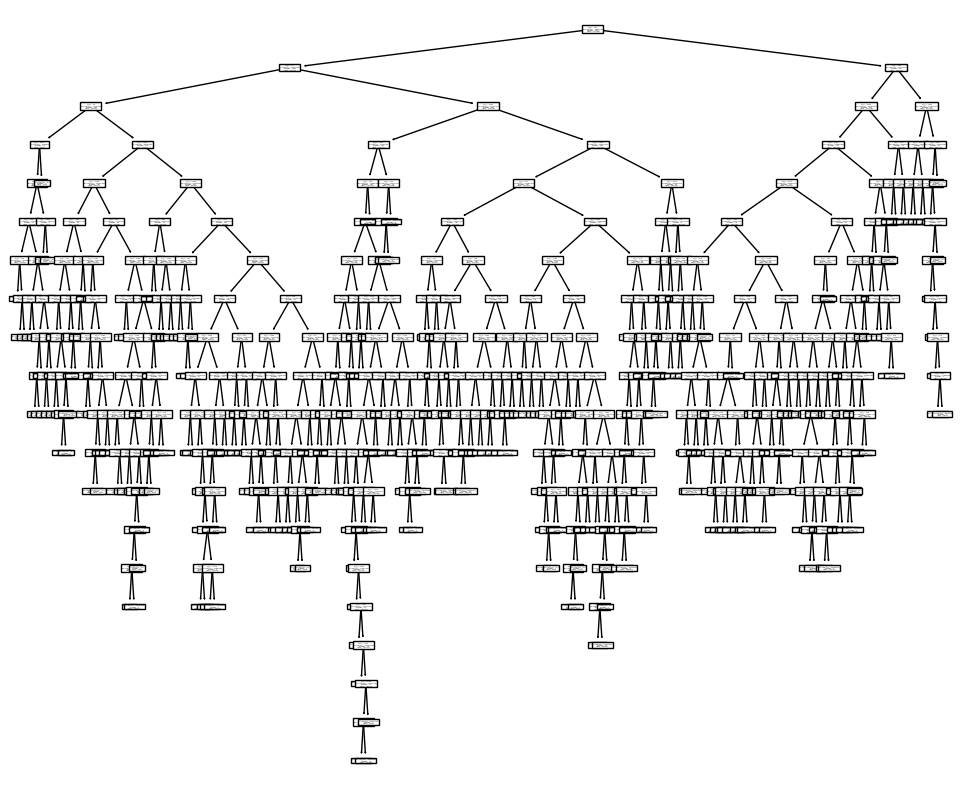

In [134]:
# narysuj model drzewa

from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 10))
ax = tree.plot_tree(modeldt_2x)
plt.show()

#### Patrząc po wartości wsp. determinacji (0.90) oraz rozmiarze drzewa (19 poziomów, 324 liści) można wywnioskować, że model jest przetrenowany 

In [135]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym (przyjęto maks. głębokość 5, by uniknąć przetrenowania)
modeldt1_2x = DecisionTreeRegressor(max_depth=5)
modeldt1_2x.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [136]:
# liczba liści
modeldt1_2x.get_n_leaves()

30

In [137]:
# predykcja na zbiorze testowym
y_preddt1_2x=modeldt1_2x.predict(X_test)

In [138]:
# współczynnik r2
r2_score(y_test, y_preddt1_2x)

0.8015462205554684

In [139]:
# metryka MSE

mean_squared_error(y_test, y_preddt1_2x)

131735.1971387358

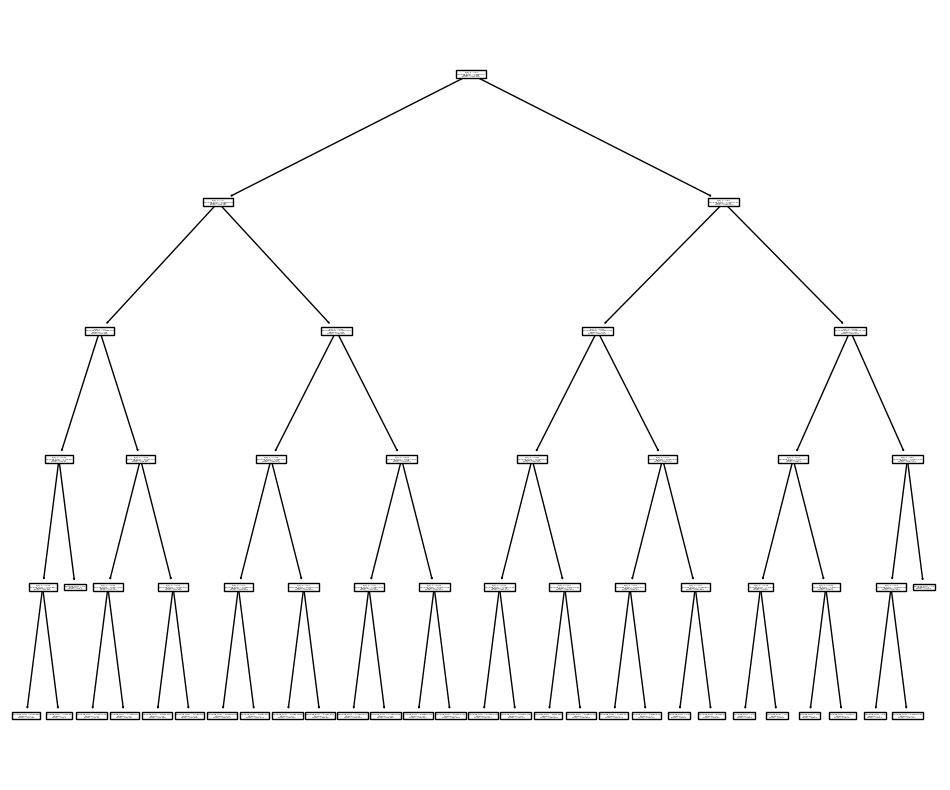

In [140]:
# model drzewa

fig, ax = plt.subplots(figsize=(12, 10))
ax = tree.plot_tree(modeldt1_2x)
plt.show()

#### Przy ograniczeniu głębokości do 5, wsp. determinacji r2 przyjmuje wartość 0.8 i model jest skuteczniejszy niż model regresji liniowej.

In [141]:
# kroswalidacja
cross_validate(modeldt1_2x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.00660586, 0.00429249, 0.00462341, 0.00419927, 0.00429773,
        0.00435066]),
 'score_time': array([0.00270796, 0.00266314, 0.00271821, 0.00344872, 0.00270987,
        0.00282288]),
 'test_score': array([0.72612189, 0.61616036, 0.60989777, 0.70890712, 0.27919789,
        0.52115669])}

# Regresja liniowa 
###### (dla 3 zmiennych: "Ram [GB]", "Memory_SSD", "TypeName_ID")

In [142]:
# zdefiniowanie zmiennej X
X = laptop[['Ram [GB]', "Memory_SSD", "TypeName_ID"]]

# y pozostaje bez zmian- "Price_euros"

In [143]:
# podzielenie danych na zbiór treningowy i testowy

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [144]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym 

modellin_3x = LinearRegression()
modellin_3x.fit(X_train, y_train)

LinearRegression()

In [145]:
# predykcja na zbiorze testowym

y_predlin_3x=modellin_3x.predict(X_test)

In [146]:
# obliczenie współczynnika r2

r2_score(y_test, y_predlin_3x)

0.7157690821067234

In [147]:
# obliczenie metryki MSE
mean_squared_error(y_test, y_predlin_3x)

188674.74384412073

In [148]:
# współczynnik przy x

modellin_3x.coef_

array([ 64.68760985, 317.96614226, 159.25892364])

In [149]:
# współczynnik dla wyrazu wolnego
modellin_3x.intercept_ 

64.10404251586237

In [150]:
pd.DataFrame({"actual":y_test, "prediction":y_predlin_3x})

,actual,prediction
1161,1769.00,2054.107637
31,199.00,352.738186
348,375.00,641.372329
385,2282.00,1377.347834
1220,1529.00,1058.829987
...,...,...
786,1089.00,1536.606758
785,1891.00,2054.107637
1008,1049.26,1058.829987
1121,1690.00,1058.829987


In [151]:
# kroswalidacja
cross_validate(modellin_3x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.0053637 , 0.00398159, 0.00315452, 0.00244999, 0.00250793,
        0.00241113]),
 'score_time': array([0.00905585, 0.00264883, 0.00153494, 0.00134802, 0.001369  ,
        0.00134778]),
 'test_score': array([0.60513244, 0.70394144, 0.68426996, 0.70244602, 0.42984436,
        0.63717548])}

# Drzewo decyzyjne
###### (dla 3 zmiennych: "Ram [GB]", "Memory_SSD, "TypeName_ID")

In [152]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym
modeldt_3x = DecisionTreeRegressor(max_depth=5)
modeldt_3x.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [153]:
# liczba liści
modeldt_3x.get_n_leaves()

25

In [154]:
# predykcja na zbiorze testowym
y_preddt_3x=modeldt_3x.predict(X_test)

In [155]:
# współczynnik r2
r2_score(y_test, y_preddt_3x)

0.7869993723693026

In [156]:
# metryka MSE

mean_squared_error(y_test, y_preddt_3x)

141391.5106587685

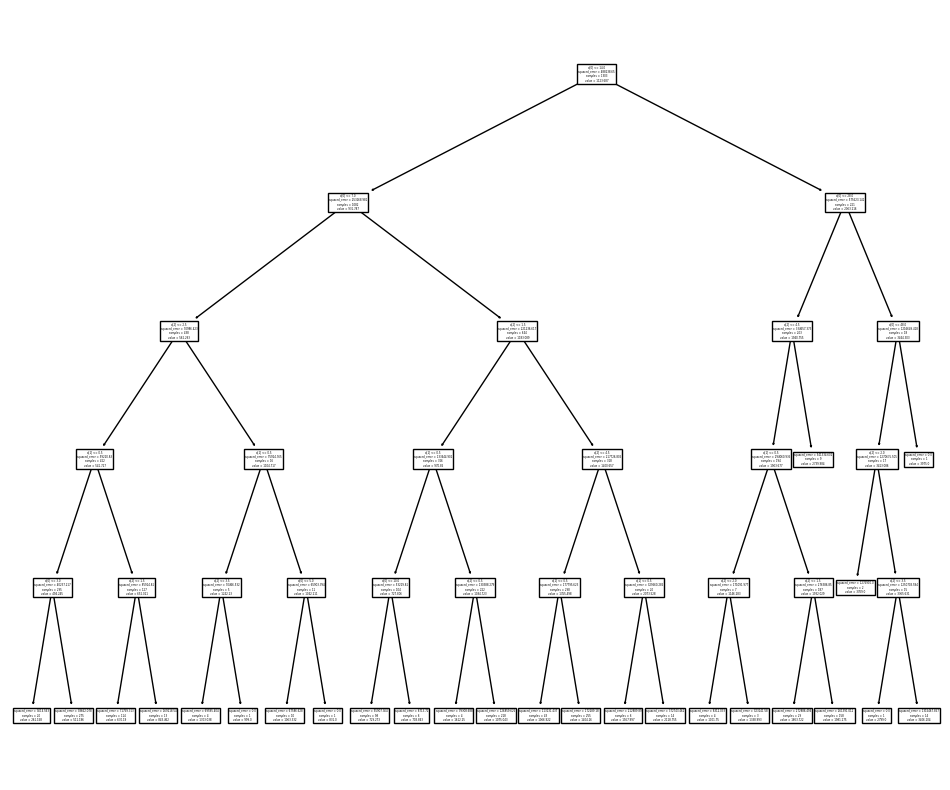

In [157]:
# model drzewa

fig, ax = plt.subplots(figsize=(12, 10))
ax = tree.plot_tree(modeldt_3x)
plt.show()

#### Współczynnik r2 dla regresji liniowej przy trzech zmiennych "Ram [GB]", "Memory_SSD, "TypeName_ID" wynosi 0.71, natomiast przy wykorzystaniu modelu drzewa decyzyjnego z ustaloną głębokością (5) współczynnik r2 wynosi 0.78, więc radzi sobie nieco lepiej.

In [158]:
# kroswalidacja
cross_validate(modeldt_3x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.016047  , 0.00405264, 0.00366855, 0.00377011, 0.00368905,
        0.00356245]),
 'score_time': array([0.0056479 , 0.00260234, 0.00251365, 0.00347257, 0.00258112,
        0.00266337]),
 'test_score': array([0.61855755, 0.6671313 , 0.67695722, 0.73435832, 0.50225142,
        0.67559024])}

In [159]:
pd.DataFrame({"actual":y_test, "prediction":y_preddt_3x})

,actual,prediction
1161,1769.00,1981.275063
31,199.00,261.157500
348,375.00,511.196327
385,2282.00,1404.159569
1220,1529.00,1075.043303
...,...,...
786,1089.00,1404.159569
785,1891.00,1981.275063
1008,1049.26,1075.043303
1121,1690.00,1075.043303


# Regresja liniowa 
###### (dla 4 zmiennych: "Ram [GB]", "Memory_SSD", "TypeName_ID", "Company_ID")

In [160]:
# zdefiniowanie zmiennej X
X = laptop[['Ram [GB]', "Memory_SSD", "TypeName_ID", "Company_ID"]]

# y pozostaje bez zmian- "Price_euros"

In [161]:
# podzielenie danych na zbiór treningowy i testowy

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [162]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym 

modellin_4x = LinearRegression()
modellin_4x.fit(X_train, y_train)

LinearRegression()

In [163]:
# predykcja na zbiorze testowym

y_predlin_4x=modellin_4x.predict(X_test)

In [165]:
# obliczenie współczynnika r2

r2_score(y_test, y_predlin_4x)

0.7208747430703516

In [166]:
# obliczenie metryki MSE
mean_squared_error(y_test, y_predlin_4x)

185285.5654900995

In [167]:
# współczynnik przy x

modellin_4x.coef_

array([ 64.07177909, 316.10823628, 154.1649736 ,   8.18957592])

In [168]:
# współczynnik dla wyrazu wolnego
modellin_4x.intercept_ 

21.918822656090015

In [169]:
# kroswalidacja
cross_validate(modellin_4x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.02127528, 0.01047516, 0.01636648, 0.01252317, 0.00918698,
        0.01121354]),
 'score_time': array([0.00325251, 0.00688314, 0.0030334 , 0.00276017, 0.0101943 ,
        0.00267315]),
 'test_score': array([0.61420623, 0.70650068, 0.69133302, 0.69815224, 0.43329145,
        0.62413793])}

In [170]:
pd.DataFrame({"actual":y_test, "prediction":y_predlin_4x})

,actual,prediction
1161,1769.00,2110.868634
31,199.00,361.554386
348,375.00,643.862918
385,2282.00,1362.233668
1220,1529.00,1053.903721
...,...,...
786,1089.00,1598.294401
785,1891.00,2110.868634
1008,1049.26,1045.714145
1121,1690.00,1045.714145


# Drzewo decyzyjne
###### (dla 4 zmiennych: "Ram [GB]", "Memory_SSD, "TypeName_ID", "Company_ID")

In [171]:
# wytrenowanie modelu regresji liniowej na zbiorze treningowym
modeldt_4x = DecisionTreeRegressor(max_depth=5)
modeldt_4x.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [172]:
# liczba liści
modeldt_4x.get_n_leaves()

28

In [173]:
# predykcja na zbiorze testowym
y_preddt_4x=modeldt_4x.predict(X_test)

In [174]:
# współczynnik r2
r2_score(y_test, y_preddt_4x)

0.8415677076727753

In [175]:
# metryka MSE

mean_squared_error(y_test, y_preddt_4x)

105168.61569120332

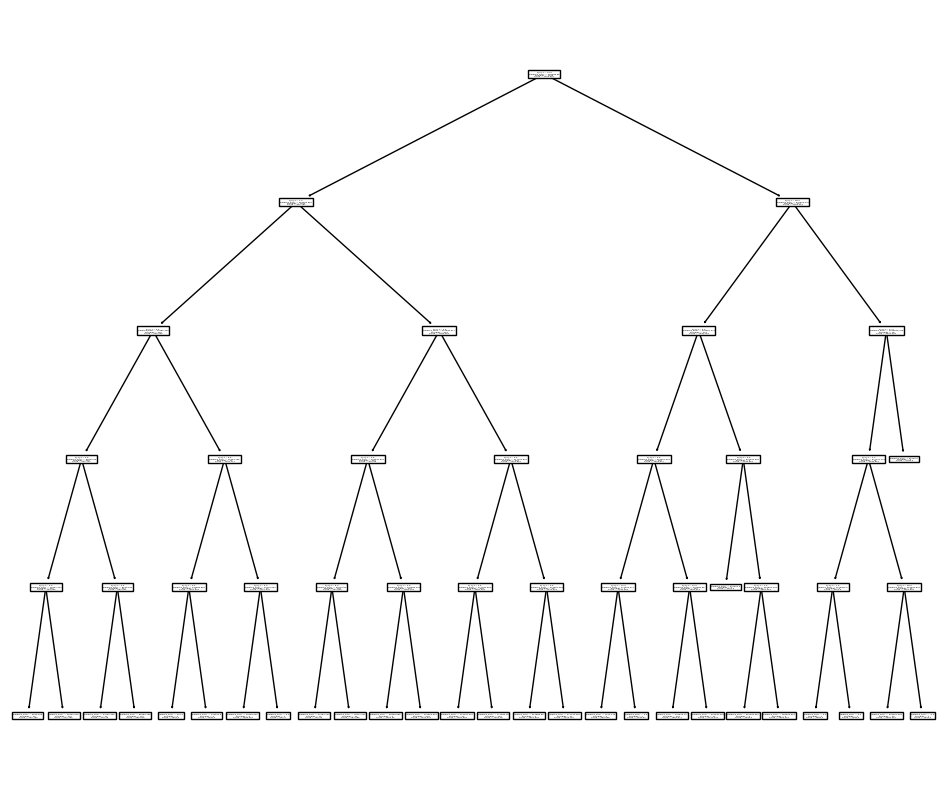

In [176]:
# model drzewa

fig, ax = plt.subplots(figsize=(12, 10))
ax = tree.plot_tree(modeldt_4x)
plt.show()

#### Współczynnik r2 dla regresji liniowej przy czterech zmiennych "Ram [GB]", "Memory_SSD, "TypeName_ID", "Company_ID" wynosi 0.72, natomiast przy wykorzystaniu modelu drzewa decyzyjnego z ustaloną głębokością (5) współczynnik r2 wynosi 0.84, więc radzi sobie lepiej.

In [177]:
# kroswalidacja
cross_validate(modeldt_4x,  # podajemy algorytm predykcyjny do testów
               X, y,
               cv=6,  # definiujemy, na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=("r2"))  # definiujemy miarę końcową

{'fit_time': array([0.00463796, 0.00373173, 0.00241637, 0.0023787 , 0.00241685,
        0.00236654]),
 'score_time': array([0.00398612, 0.00167608, 0.00151062, 0.00151825, 0.00155735,
        0.00144935]),
 'test_score': array([0.61383867, 0.66507923, 0.69197011, 0.74440257, 0.51438812,
        0.6720024 ])}

#### Kroswalidacja pokazuje nam jakiego mniej więcej współczynnika determinacji r2 oczekujemy.

In [178]:
pd.DataFrame({"actual":y_test, "prediction":y_preddt_4x})

,actual,prediction
1161,1769.00,2172.242927
31,199.00,261.157500
348,375.00,511.196327
385,2282.00,1404.159569
1220,1529.00,1075.043303
...,...,...
786,1089.00,1404.159569
785,1891.00,2172.242927
1008,1049.26,1075.043303
1121,1690.00,1075.043303
